In [7]:
AMBIENTE_EXEC = 'local' # colab, local

if AMBIENTE_EXEC == 'colab':
  path = '/content/'
else:
  path = 'data/'

In [8]:
import pandas as pd
import string
from collections import defaultdict

In [9]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RANIERDALTONDOCOUTO\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stopwords.words('portuguese')

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [11]:
# df_ep6 = pd.read_csv("data/ep6.csv", encoding="utf-8")
# df_ep5 = pd.read_csv("data/ep5.csv", encoding="utf-8")
# df_ep4 = pd.read_csv("data/ep4.csv", encoding="utf-8")

In [12]:
df_ep6 = pd.read_csv(f"{path}ep6.csv", encoding="utf-8")
df_ep5 = pd.read_csv(f"{path}ep6.csv", encoding="utf-8")
df_ep4 = pd.read_csv(f"{path}ep6.csv", encoding="utf-8")

In [13]:
df_ep6.head()

,personagem,diálogo
0,SHUTTLE CAPTAIN,"Estação de comando, esta é a ST 321. Liberação..."
1,DEATH STAR CONTROLLER,O escudo defletor de segurança será desativado...
2,SHUTTLE CAPTAIN,Estamos começando nossa abordagem.
3,OFICIAL,Informe o comandante que a nave de Lord Vader ...
4,OPERADOR,"Sim, senhor."


In [14]:
nltk.download('stopwords')
stopword_pt_list = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RANIERDALTONDOCOUTO\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stopword_pt_list.append('estação')
stopword_pt_list.append('ia')
stopword_pt_list.append('ia')
stopword_pt_list.append('todo')
stopword_pt_list.append('toda')
stopword_pt_list.append('ei')
stopword_pt_list.append('quê')
stopword_pt_list.append('ai')
stopword_pt_list.append('sei')

In [16]:
contador_personagens_ep6 = defaultdict(lambda: defaultdict(int))

for touple in df_ep6.itertuples():
    personagem = touple.personagem
    fala = touple.diálogo
    tokens = str(fala).lower().split()
    palavras_filtradas = [palavra.strip() for palavra in tokens if palavra.isalpha() and palavra not in stopword_pt_list]

    for palavra in palavras_filtradas:
        contador_personagens_ep6[personagem][palavra] += 1



In [17]:
contador_personagens_ep5 = defaultdict(lambda: defaultdict(int))

for touple in df_ep6.itertuples():
    personagem = touple.personagem
    fala = touple.diálogo
    tokens = str(fala).lower().split()
    palavras_filtradas = [palavra.strip() for palavra in tokens if palavra.isalpha() and palavra not in stopword_pt_list]

    for palavra in palavras_filtradas:
        contador_personagens_ep5[personagem][palavra] += 1

In [18]:
contador_personagens_ep4 = defaultdict(lambda: defaultdict(int))

for touple in df_ep6.itertuples():
    personagem = touple.personagem
    fala = touple.diálogo
    tokens = str(fala).lower().split()
    palavras_filtradas = [palavra.strip() for palavra in tokens if palavra.isalpha() and palavra not in stopword_pt_list]

    for palavra in palavras_filtradas:
        contador_personagens_ep4[personagem][palavra] += 1

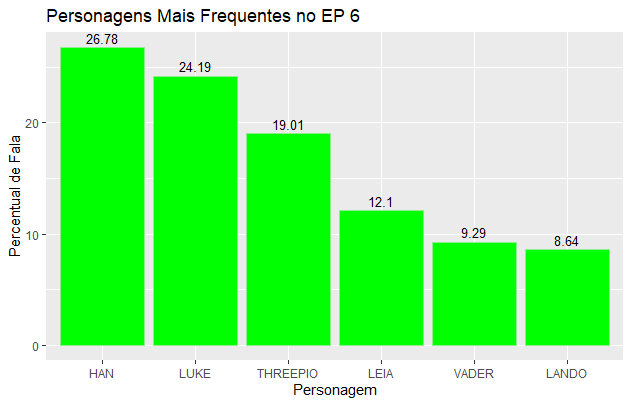

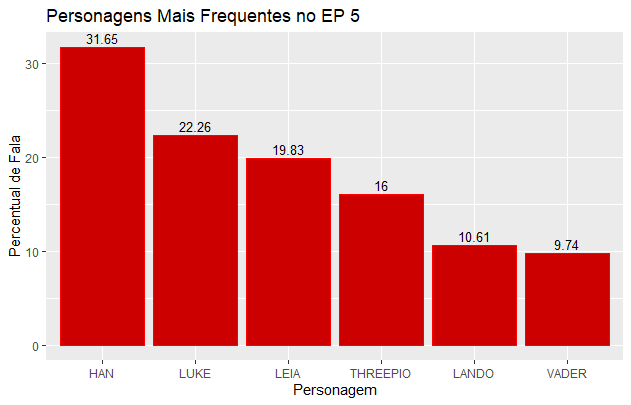

![alt text](res/graficos-freq-person/person-freq-ep4.png)

In [19]:
personagens_episodio6 = ['HAN', 'LUKE','THREEPIO', 'LEIA', 'VADER','LANDO']
personagens_episodio5 = ['HAN', 'LUKE','LEIA','THREEPIO', 'LANDO', 'VADER']
personagens_episodio4 = ['LUKE','HAN', 'THREEPIO', 'BEN', 'LEIA','VADER']

In [20]:
palavras_mais_ditas_ep6 = dict()

for personagem in personagens_episodio6:
    palavras_mais_ditas_ep6[personagem] = sorted(contador_personagens_ep6[personagem].items(), key=lambda x: x[1], reverse=True)

print(palavras_mais_ditas_ep6)

{'HAN': [('vamos', 7), ('vai', 7), ('tudo', 6), ('lando', 6), ('acho', 5), ('onde', 4), ('acontecendo', 3), ('pensando', 3), ('grande', 3), ('agora', 3), ('bom', 3), ('nada', 3), ('alguns', 3), ('consigo', 2), ('pode', 2), ('tão', 2), ('borrão', 2), ('pedaço', 2), ('boba', 2), ('ver', 2), ('monte', 2), ('então', 2), ('lá', 2), ('sobre', 2), ('coisa', 2), ('devo', 2), ('olhe', 2), ('ataque', 2), ('disse', 2), ('boa', 2), ('leve', 2), ('ajuda', 2), ('sensação', 2), ('bem', 2), ('fique', 2), ('manter', 2), ('fazer', 2), ('chewie', 2), ('cuidaremos', 2), ('fica', 2), ('ahhh', 2), ('apenas', 2), ('sempre', 2), ('poderia', 2), ('conheço', 1), ('indo', 1), ('pagar', 1), ('desviei', 1), ('pago', 1), ('jogando', 1), ('fortuna', 1), ('luke', 1), ('cuidar', 1), ('si', 1), ('menos', 1), ('resgatar', 1), ('cavaleiro', 1), ('disso', 1), ('mundo', 1), ('delírios', 1), ('juntos', 1), ('odeio', 1), ('longas', 1), ('parece', 1), ('passar', 1), ('olhos', 1), ('vez', 1), ('vejo', 1), ('morrer', 1), ('três

In [21]:
palavras_mais_ditas_ep5 = dict()

for personagem in personagens_episodio5:
    palavras_mais_ditas_ep5[personagem] = sorted(contador_personagens_ep5[personagem].items(), key=lambda x: x[1], reverse=True)

print(palavras_mais_ditas_ep5)

{'HAN': [('vamos', 7), ('vai', 7), ('tudo', 6), ('lando', 6), ('acho', 5), ('onde', 4), ('acontecendo', 3), ('pensando', 3), ('grande', 3), ('agora', 3), ('bom', 3), ('nada', 3), ('alguns', 3), ('consigo', 2), ('pode', 2), ('tão', 2), ('borrão', 2), ('pedaço', 2), ('boba', 2), ('ver', 2), ('monte', 2), ('então', 2), ('lá', 2), ('sobre', 2), ('coisa', 2), ('devo', 2), ('olhe', 2), ('ataque', 2), ('disse', 2), ('boa', 2), ('leve', 2), ('ajuda', 2), ('sensação', 2), ('bem', 2), ('fique', 2), ('manter', 2), ('fazer', 2), ('chewie', 2), ('cuidaremos', 2), ('fica', 2), ('ahhh', 2), ('apenas', 2), ('sempre', 2), ('poderia', 2), ('conheço', 1), ('indo', 1), ('pagar', 1), ('desviei', 1), ('pago', 1), ('jogando', 1), ('fortuna', 1), ('luke', 1), ('cuidar', 1), ('si', 1), ('menos', 1), ('resgatar', 1), ('cavaleiro', 1), ('disso', 1), ('mundo', 1), ('delírios', 1), ('juntos', 1), ('odeio', 1), ('longas', 1), ('parece', 1), ('passar', 1), ('olhos', 1), ('vez', 1), ('vejo', 1), ('morrer', 1), ('três

In [22]:
palavras_mais_ditas_ep4 = dict()

for personagem in personagens_episodio4:
    palavras_mais_ditas_ep4[personagem] = sorted(contador_personagens_ep4[personagem].items(), key=lambda x: x[1], reverse=True)

print(palavras_mais_ditas_ep4)

{'LUKE': [('vai', 8), ('pode', 8), ('posso', 7), ('vader', 6), ('vou', 6), ('apenas', 4), ('lado', 4), ('capitão', 3), ('solo', 3), ('preciso', 3), ('levar', 3), ('ter', 3), ('então', 3), ('fazer', 3), ('deixar', 3), ('vamos', 3), ('pai', 3), ('raiva', 2), ('dois', 2), ('bem', 2), ('devo', 2), ('deveria', 2), ('fique', 2), ('aponte', 2), ('promessa', 2), ('velho', 2), ('mestre', 2), ('darth', 2), ('matar', 2), ('tudo', 2), ('colocando', 2), ('missão', 2), ('threepio', 2), ('diga', 2), ('nunca', 2), ('senti', 2), ('algo', 2), ('bom', 2), ('imperador', 2), ('sinto', 2), ('lutar', 2), ('luke', 1), ('cavaleiro', 1), ('jedi', 1), ('amigo', 1), ('poderoso', 1), ('deve', 1), ('igualmente', 1), ('busco', 1), ('audiência', 1), ('vossa', 1), ('grandeza', 1), ('barganhar', 1), ('vida', 1), ('certeza', 1), ('podemos', 1), ('chegar', 1), ('acordo', 1), ('mutuamente', 1), ('benéfico', 1), ('permita', 1), ('evitar', 1), ('qualquer', 1), ('confronto', 1), ('prova', 1), ('boa', 1), ('vontade', 1), ('ap

In [23]:
for personagem, palavras in palavras_mais_ditas_ep4.items():
    df = pd.DataFrame(palavras, columns=["palavra", "quantidade"])
    df.to_csv(f"{path}palavras-personagens/EP4/{personagem}.csv", index=False)

In [24]:
for personagem, palavras in palavras_mais_ditas_ep5.items():
    df = pd.DataFrame(palavras, columns=["palavra", "quantidade"])
    df.to_csv(f"{path}palavras-personagens/EP5/{personagem}.csv", index=False)

In [25]:
for personagem, palavras in palavras_mais_ditas_ep6.items():
    df = pd.DataFrame(palavras, columns=["palavra", "quantidade"])
    df.to_csv(f"{path}palavras-personagens/EP6/{personagem}.csv", index=False)

PERSONAGEM MAIS APARECE: LUKE E HAN

PERSONAGEM MENOS APARECE: (REFAZER GRÁFICO INVERSO DOS QUE MAIS APARECEM)

PERSONAGEM MAIS POSITIVO:

PERSONAGEM MAIS NEGATIVO: